In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
def calculate_median(data_list, start_index, end_index):
    return np.median([data['stop_time'] - data['start_time'] for data in data_list[start_index:end_index]])

def extract_median_runtime_with_samples(df, num_samples):
    if num_samples > len(df):
        num_samples = len(df)
    data_list = df[df['data'].notna()]['data'].tolist()[:num_samples]
    keys = df[df['data'].notna()].index.tolist()

    avgs = []
    BATCH_SIZE = 1

    for i in range(0, len(data_list), BATCH_SIZE):
        avg = calculate_median(data_list, i, min(i + BATCH_SIZE, len(data_list)))
        config = keys[i].split(";")
        avgs.append((config[0], config[1], avg))

    df_data = pd.DataFrame(avgs, columns=['cores', 'input', 'exec_time'])
    return df_data

def extract_median_runtime(df):
    data_list = df[df['data'].notna()]['data'].tolist()
    keys = df[df['data'].notna()].index.tolist()

    avgs = []
    BATCH_SIZE = 1

    for i in range(0, len(data_list), BATCH_SIZE):
        avg = calculate_median(data_list, i, min(i + BATCH_SIZE, len(data_list)))
        config = keys[i].split(";")
        avgs.append((config[0], config[1], avg))

    df_data = pd.DataFrame(avgs, columns=['cores', 'input', 'exec_time'])
    return df_data

In [25]:
def ditribution_plot(x1, y1, name1, x2, y2, name2, x3, y3, name3, subtitle):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    sns.barplot(x=x1, y=y1, ax=axes[0])
    axes[0].set_title(name1)

    sns.barplot(x=x2, y=y2, ax=axes[1])
    axes[1].set_title(name2)

    sns.barplot(x=x3, y=y3, ax=axes[2])
    axes[2].set_title(name3)

    fig.suptitle(subtitle, fontsize=16)
    plt.tight_layout()
    plt.show()

def count_dist(df_total, df_preprocessing, x):
    all_x = df_total[x].value_counts().index

    x_dist = df_preprocessing[x].value_counts()

    x_dist = x_dist.reindex(all_x, fill_value=0)
    x_dist.sort_index(key=lambda x: x.astype(int), inplace=True)

    return x_dist

### Pré-processamento randômico

In [26]:
df_random = pd.read_json('runs/matrix_multiplication/sp/mm_model_random_output_sp.json')

df_data_random = extract_median_runtime(df_random)
df_random_preprocessing_100 = extract_median_runtime_with_samples(df_random, 100)
df_random_preprocessing_300 = extract_median_runtime_with_samples(df_random, 300)
df_random_preprocessing_500 = extract_median_runtime_with_samples(df_random, 500)

In [27]:
core_dist_100 = count_dist(df_data_random, df_random_preprocessing_100, 'exec_time')
core_dist_300 = count_dist(df_data_random, df_random_preprocessing_300, 'exec_time')
core_dist_500 = count_dist(df_data_random, df_random_preprocessing_500, 'exec_time')

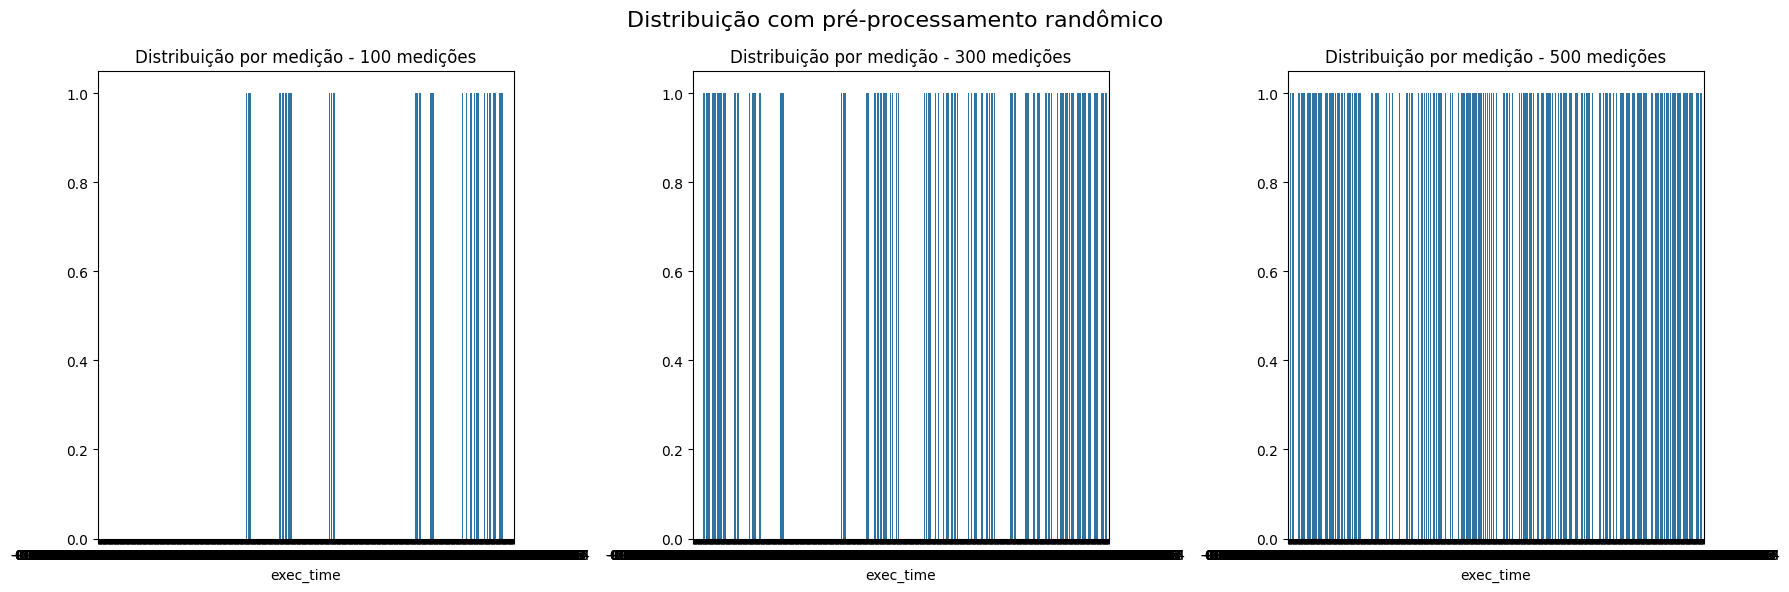

In [28]:
ditribution_plot(
    x1=core_dist_100.index, 
    y1=core_dist_100.values, 
    name1='Distribuição por medição - {0} medições'.format(100),
    x2=core_dist_300.index,
    y2=core_dist_300.values,
    name2='Distribuição por medição - {0} medições'.format(300),
    x3=core_dist_500.index,
    y3=core_dist_500.values,
    name3='Distribuição por medição - {0} medições'.format(500),
    subtitle="Distribuição com pré-processamento randômico"
    )

### Pré-processamento único núcleo e último núcleo

In [29]:
df_single_last = pd.read_json('runs/matrix_multiplication/sp/mm_model_single_last_output_sp.json')

df_data_single_last = extract_median_runtime(df_single_last)
df_single_last_preprocessing_100 = extract_median_runtime_with_samples(df_single_last, 100)
df_single_last_preprocessing_300 = extract_median_runtime_with_samples(df_single_last, 300)
df_single_last_preprocessing_500 = extract_median_runtime_with_samples(df_single_last, 500)

In [30]:
core_dist_100 = count_dist(df_data_single_last, df_single_last_preprocessing_100, 'cores')
input_dist_100 = count_dist(df_data_single_last, df_single_last_preprocessing_100, 'input')

core_dist_300 = count_dist(df_data_single_last, df_single_last_preprocessing_300, 'cores')
input_dist_300 = count_dist(df_data_single_last, df_single_last_preprocessing_300, 'input')

core_dist_500 = count_dist(df_data_single_last, df_single_last_preprocessing_500, 'cores')
input_dist_500 = count_dist(df_data_single_last, df_single_last_preprocessing_500, 'input')

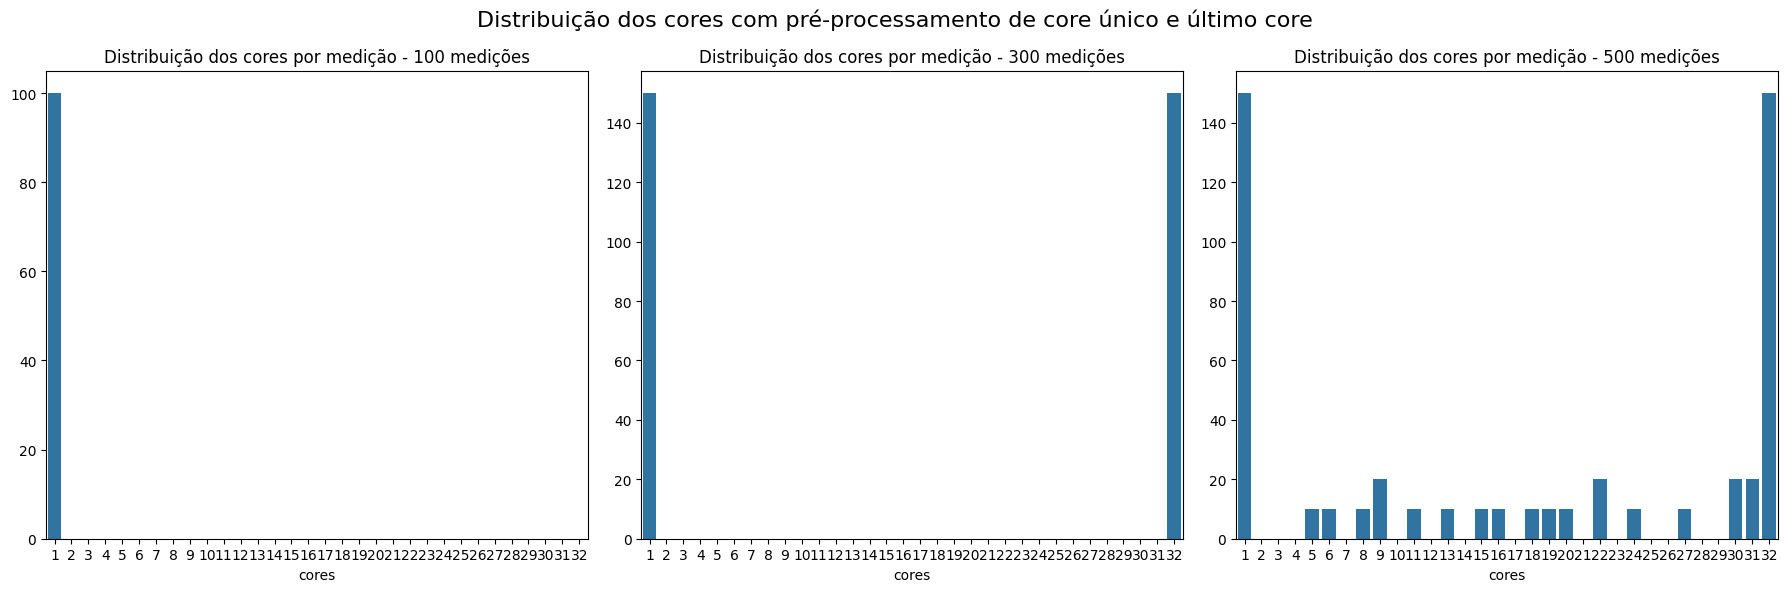

In [31]:
ditribution_plot(
    x1=core_dist_100.index, 
    y1=core_dist_100.values, 
    name1='Distribuição dos cores por medição - {0} medições'.format(100),
    x2=core_dist_300.index,
    y2=core_dist_300.values,
    name2='Distribuição dos cores por medição - {0} medições'.format(300),
    x3=core_dist_500.index,
    y3=core_dist_500.values,
    name3='Distribuição dos cores por medição - {0} medições'.format(500),
    subtitle="Distribuição dos cores com pré-processamento de core único e último core"
    )

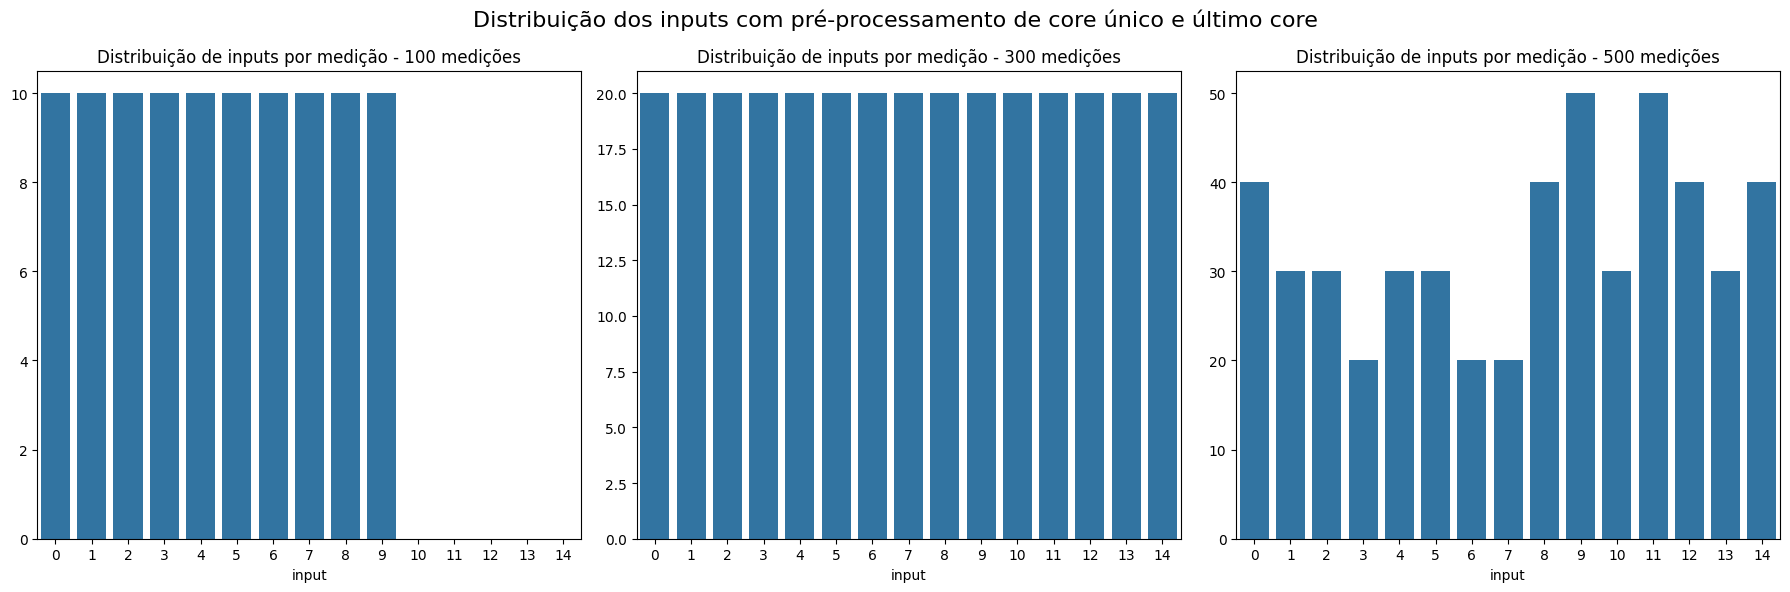

In [32]:
ditribution_plot(
    x1=input_dist_100.index,
    y1=input_dist_100.values,
    name1='Distribuição de inputs por medição - {0} medições'.format(100),
    x2=input_dist_300.index,
    y2=input_dist_300.values,
    name2='Distribuição de inputs por medição - {0} medições'.format(300),
    x3=input_dist_500.index,
    y3=input_dist_500.values,
    name3='Distribuição de inputs por medição - {0} medições'.format(500),
    subtitle='Distribuição dos inputs com pré-processamento de core único e último core'
    )

### teste

Estatísticas gerais:
- Tempo médio de execução: 2.71 segundos
- Mediana do tempo de execução: 0.94 segundos
- Desvio padrão: 4.33 segundos
- Número de configurações únicas: 480



C:\Users\PC\AppData\Local\Temp\ipykernel_20108\1152040191.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cores', y='exec_time', palette='viridis')


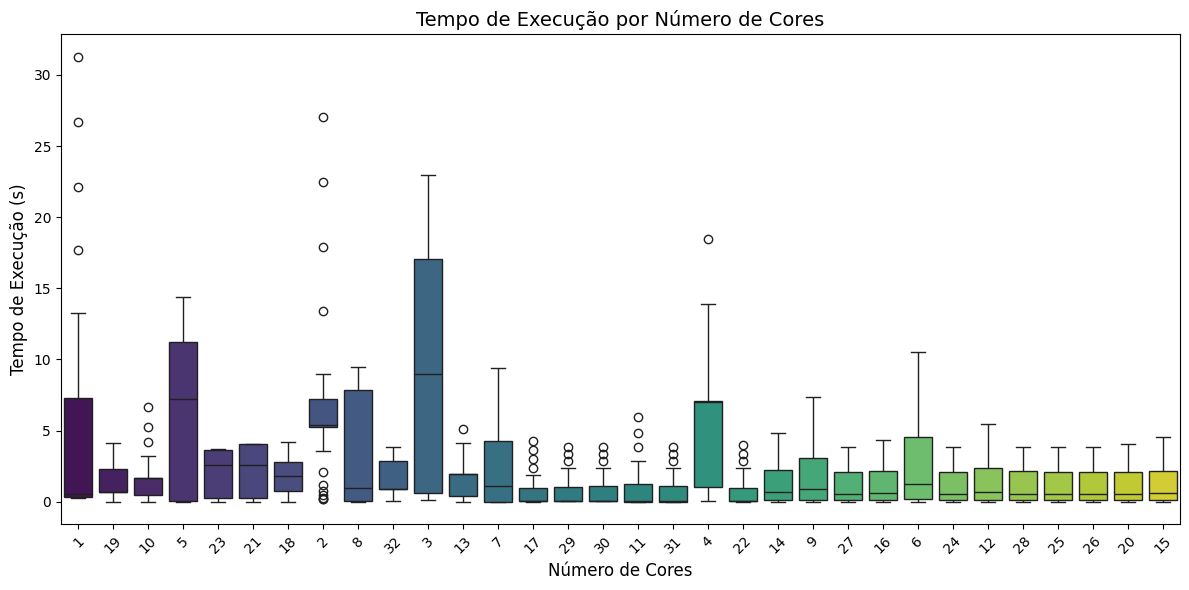

C:\Users\PC\AppData\Local\Temp\ipykernel_20108\1152040191.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='input', y='exec_time', palette='magma')


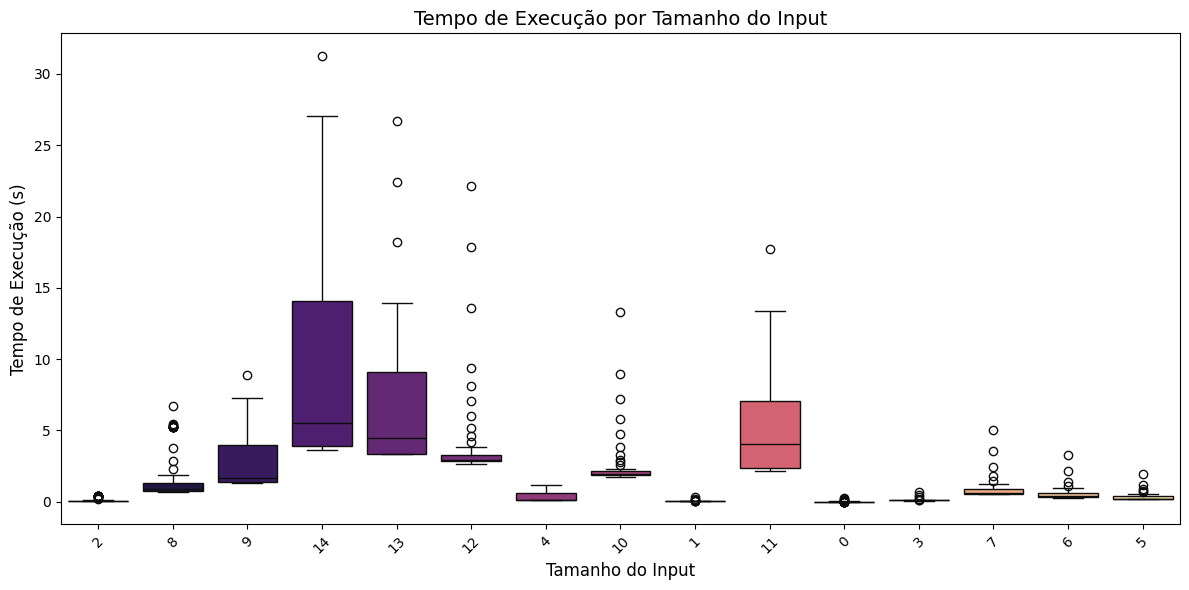

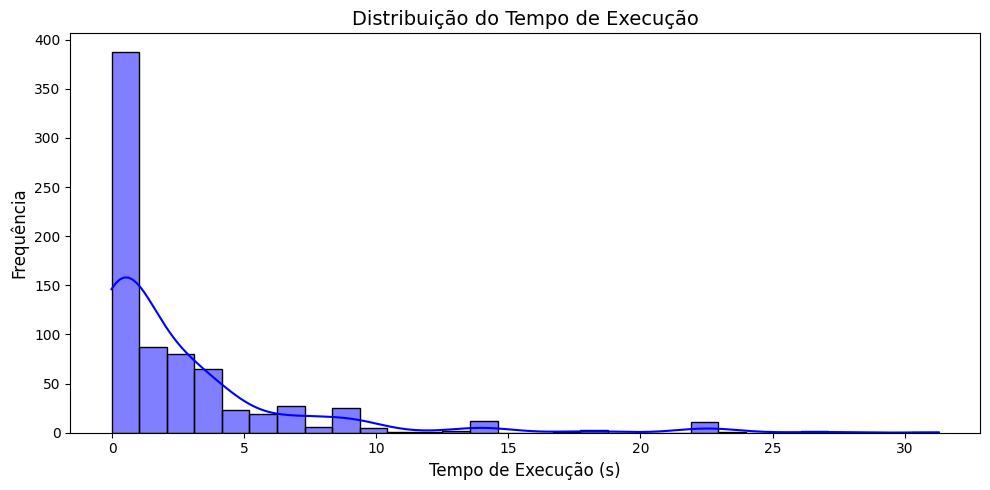

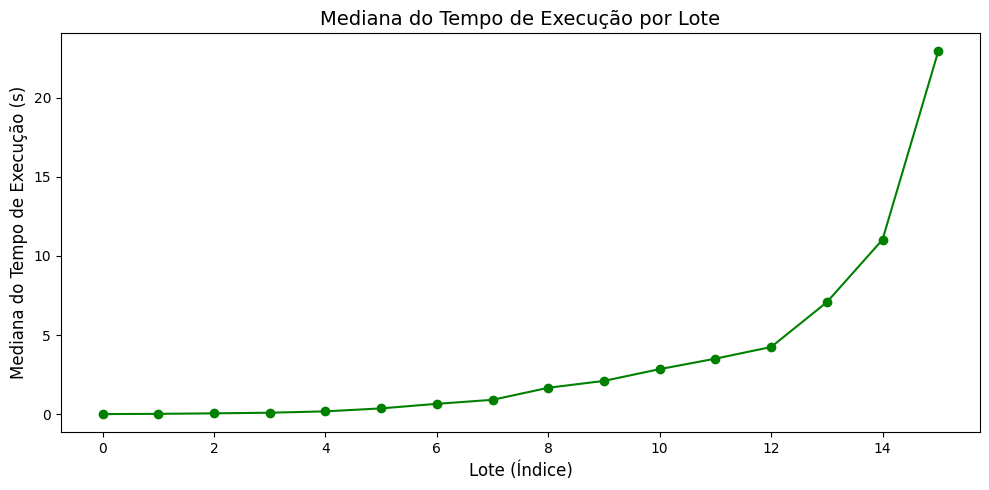

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Função para carregar e pré-processar os dados
def load_and_preprocess_data(file_path):
    # Carregar o JSON
    df = pd.read_json(file_path)

    # Definir o índice do DataFrame como a coluna 'index' se existir
    if 'index' in df.columns:
        df.set_index('index', inplace=True)

    # Separar os índices para extrair 'cores' e 'input' das 3 partes
    def extract_index_parts(index_value):
        parts = index_value.split(";")
        if len(parts) >= 2:  # Garantir que temos pelo menos duas partes
            return parts[0], parts[1]
        return None, None  # Retornar valores nulos se o índice não estiver no formato esperado

    # Aplicar a função de extração
    df['cores'], df['input'] = zip(*df.index.map(extract_index_parts))

    # Calcular o tempo de execução (stop_time - start_time)
    df['exec_time'] = df['data'].apply(lambda x: x['stop_time'] - x['start_time'] if pd.notna(x) else None)

    # Remover valores ausentes
    df = df.dropna(subset=['exec_time', 'cores', 'input'])  # Remover linhas com dados ausentes em qualquer coluna importante
    return df

# Função para calcular estatísticas descritivas
def calculate_statistics(df):
    print("Estatísticas gerais:")
    print(f"- Tempo médio de execução: {df['exec_time'].mean():.2f} segundos")
    print(f"- Mediana do tempo de execução: {df['exec_time'].median():.2f} segundos")
    print(f"- Desvio padrão: {df['exec_time'].std():.2f} segundos")
    print(f"- Número de configurações únicas: {df[['cores', 'input']].drop_duplicates().shape[0]}")
    print("")

# Função para visualizar tendências com base no número de 'cores' e 'input'
def plot_trends(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='cores', y='exec_time', palette='viridis')
    plt.title('Tempo de Execução por Número de Cores', fontsize=14)
    plt.xlabel('Número de Cores', fontsize=12)
    plt.ylabel('Tempo de Execução (s)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='input', y='exec_time', palette='magma')
    plt.title('Tempo de Execução por Tamanho do Input', fontsize=14)
    plt.xlabel('Tamanho do Input', fontsize=12)
    plt.ylabel('Tempo de Execução (s)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Função para visualizar distribuição geral dos tempos de execução
def plot_distribution(df):
    plt.figure(figsize=(10, 5))
    sns.histplot(df['exec_time'], kde=True, bins=30, color='blue')
    plt.title('Distribuição do Tempo de Execução', fontsize=14)
    plt.xlabel('Tempo de Execução (s)', fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.tight_layout()
    plt.show()

# Função para agrupar os tempos de execução por lotes (batch) e analisar a tendência
def analyze_batch_trends(df, batch_size=50):
    df_sorted = df.sort_values(by='exec_time').reset_index(drop=True)
    batch_medians = []
    
    for i in range(0, len(df_sorted), batch_size):
        batch = df_sorted.iloc[i:i+batch_size]
        batch_medians.append(batch['exec_time'].median())
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(batch_medians)), batch_medians, marker='o', linestyle='-', color='green')
    plt.title('Mediana do Tempo de Execução por Lote', fontsize=14)
    plt.xlabel('Lote (Índice)', fontsize=12)
    plt.ylabel('Mediana do Tempo de Execução (s)', fontsize=12)
    plt.tight_layout()
    plt.show()

# Carregar e processar os dados
file_path = 'runs/matrix_multiplication/sp/mm_model_random_output_sp.json'
df = load_and_preprocess_data(file_path)

# Analisar estatísticas descritivas
calculate_statistics(df)

# Visualizar tendências
plot_trends(df)

# Visualizar distribuição geral
plot_distribution(df)

# Analisar tendências por lotes
analyze_batch_trends(df)
